# EDA & Data Preprocessing on Google App Store Rating Dataset.

1. Import required libraries and read the dataset.

In [126]:
#Importing required libraries

In [216]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [128]:
#To read the dataset

In [129]:
df=pd.read_csv("Apps_data+(1).csv")
df

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews                Size     Installs  Type Price  \
0         4.1     159                 19M      10,000+  Free     0   
1         3.9     967                 14M     500,000+  Free     0   
2         4.7   87510                8.7M   5,000,000+  Free     0   
3         4.5  215644                 25M  50,000,000+  Free     0   
4         4.3     967                2.8M     100,000+  Free     0   
...       ...     ...                 ...          ...   ...   ...   
10836     4.5      38                 53M       5,000+  Free     0   
10837     5.0       4                3.6M         100+  Free     0   
10838     NaN       3                9.5M       1,000+  Free     0   
10839     4.5     114  Varies with device       1,000+  Free     0   
10840     4.5  398307                 19M  10,000,000+  Free     0   

      Content Rating                     Genres      Last Updated  \
0           Everyone               Art & Design   January 7, 2018   
1           Everyone  Art & Design;Pretend Play  January 15, 2018   
2           Everyone               Art & Design    August 1, 2018   
3               Teen               Art & Design      June 8, 2018   
4           Everyone    Art & Design;Creativity     June 20, 2018   
...              ...                        ...               ...   
10836       Everyone                  Education     July 25, 2017   
10837       Everyone                  Education      July 6, 2018   
10838       Everyone                    Medical  January 20, 2017   
10839     Mature 17+          Books & Reference  January 19, 2015   
10840       Everyone                  Lifestyle     July 25, 2018   

              Current Ver         Android Ver  
0                   1.0.0        4.0.3 and up  
1                   2.0.0        4.0.3 and up  
2                   1.2.4        4.0.3 and up  
3      Varies with device          4.2 and up  
4                     1.1          4.4 and up  
...                   ...                 ...  
10836                1.48          4.1 and up  
10837                 1.0          4.1 and up  
10838                 1.0          2.2 and up  
10839  Varies with device  Varies with device  
10840  Varies with device  Varies with device  

[10841 rows x 13 columns]

2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [130]:
#To check samples

In [131]:
df.head(10)

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   
5                         Paper flowers instructions  ART_AND_DESIGN     4.4   
6            Smoke Effect Photo Maker - Smoke Editor  ART_AND_DESIGN     3.8   
7                                   Infinite Painter  ART_AND_DESIGN     4.1   
8                               Garden Coloring Book  ART_AND_DESIGN     4.4   
9                      Kids Paint Free - Drawing Fun  ART_AND_DESIGN     4.7   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   
5     167  5.6M      50,000+  Free     0       Everyone   
6     178   19M      50,000+  Free     0       Everyone   
7   36815   29M   1,000,000+  Free     0       Everyone   
8   13791   33M   1,000,000+  Free     0       Everyone   
9     121  3.1M      10,000+  Free     0       Everyone   

                      Genres        Last Updated         Current Ver  \
0               Art & Design     January 7, 2018               1.0.0   
1  Art & Design;Pretend Play    January 15, 2018               2.0.0   
2               Art & Design      August 1, 2018               1.2.4   
3               Art & Design        June 8, 2018  Varies with device   
4    Art & Design;Creativity       June 20, 2018                 1.1   
5               Art & Design      March 26, 2017                 1.0   
6               Art & Design      April 26, 2018                 1.1   
7               Art & Design       June 14, 2018            6.1.61.1   
8               Art & Design  September 20, 2017               2.9.2   
9    Art & Design;Creativity        July 3, 2018                 2.8   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up  
5    2.3 and up  
6  4.0.3 and up  
7    4.2 and up  
8    3.0 and up  
9  4.0.3 and up

In [132]:
#To check the shape of the data

In [133]:
df.shape

(10841, 13)

The data df contains 10840 rows ans 18 columns.

In [134]:
# To check the information of data

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [136]:
#To chech the data types

In [137]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

From info,analysis can be made that out of 18 attributes 5 attribute that is "Rating","Size","Type","Current Ver","Android Ver" has null values.

3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model
building

In [138]:
#To check summary statistics

In [139]:
df.describe(include="all").T


count unique                 top   freq      mean       std  \
App              10841   9660              ROBLOX      9       NaN       NaN   
Category         10841     34              FAMILY   1972       NaN       NaN   
Rating          9367.0    NaN                 NaN    NaN  4.193338  0.537431   
Reviews          10841   6002                   0    596       NaN       NaN   
Size             10841    462  Varies with device   1695       NaN       NaN   
Installs         10841     22          1,000,000+   1579       NaN       NaN   
Type             10840      3                Free  10039       NaN       NaN   
Price            10841     93                   0  10040       NaN       NaN   
Content Rating   10840      6            Everyone   8714       NaN       NaN   
Genres           10841    120               Tools    842       NaN       NaN   
Last Updated     10841   1378      August 3, 2018    326       NaN       NaN   
Current Ver      10833   2832  Varies with device   1459       NaN       NaN   
Android Ver      10838     33          4.1 and up   2451       NaN       NaN   

                min  25%  50%  75%   max  
App             NaN  NaN  NaN  NaN   NaN  
Category        NaN  NaN  NaN  NaN   NaN  
Rating          1.0  4.0  4.3  4.5  19.0  
Reviews         NaN  NaN  NaN  NaN   NaN  
Size            NaN  NaN  NaN  NaN   NaN  
Installs        NaN  NaN  NaN  NaN   NaN  
Type            NaN  NaN  NaN  NaN   NaN  
Price           NaN  NaN  NaN  NaN   NaN  
Content Rating  NaN  NaN  NaN  NaN   NaN  
Genres          NaN  NaN  NaN  NaN   NaN  
Last Updated    NaN  NaN  NaN  NaN   NaN  
Current Ver     NaN  NaN  NaN  NaN   NaN  
Android Ver     NaN  NaN  NaN  NaN   NaN

4. Check if there are any duplicate records in the dataset? if any drop them.

In [140]:
# To check duplicates

In [141]:
df[df.duplicated()]

App      Category  Rating  \
229                       Quick PDF Scanner + OCR FREE      BUSINESS     4.2   
236                                                Box      BUSINESS     4.2   
239                                 Google My Business      BUSINESS     4.4   
256                                ZOOM Cloud Meetings      BUSINESS     4.4   
261                          join.me - Simple Meetings      BUSINESS     4.0   
...                                                ...           ...     ...   
8643                    Wunderlist: To-Do List & Tasks  PRODUCTIVITY     4.6   
8654   TickTick: To Do List with Reminder, Day Planner  PRODUCTIVITY     4.6   
8658                           ColorNote Notepad Notes  PRODUCTIVITY     4.6   
10049        Airway Ex - Intubate. Anesthetize. Train.       MEDICAL     4.3   
10768                                             AAFP       MEDICAL     3.8   

       Reviews                Size      Installs  Type Price Content Rating  \
229      80805  Varies with device    5,000,000+  Free     0       Everyone   
236     159872  Varies with device   10,000,000+  Free     0       Everyone   
239      70991  Varies with device    5,000,000+  Free     0       Everyone   
256      31614                 37M   10,000,000+  Free     0       Everyone   
261       6989  Varies with device    1,000,000+  Free     0       Everyone   
...        ...                 ...           ...   ...   ...            ...   
8643    404610  Varies with device   10,000,000+  Free     0       Everyone   
8654     25370  Varies with device    1,000,000+  Free     0       Everyone   
8658   2401017  Varies with device  100,000,000+  Free     0       Everyone   
10049      123                 86M       10,000+  Free     0       Everyone   
10768       63                 24M       10,000+  Free     0       Everyone   

             Genres       Last Updated         Current Ver         Android Ver  
229        Business  February 26, 2018  Varies with device        4.0.3 and up  
236        Business      July 31, 2018  Varies with device  Varies with device  
239        Business      July 24, 2018    2.19.0.204537701          4.4 and up  
256        Business      July 20, 2018      4.1.28165.0716          4.0 and up  
261        Business      July 16, 2018           4.3.0.508          4.4 and up  
...             ...                ...                 ...                 ...  
8643   Productivity      April 6, 2018  Varies with device  Varies with device  
8654   Productivity     August 6, 2018  Varies with device  Varies with device  
8658   Productivity      June 27, 2018  Varies with device  Varies with device  
10049       Medical       June 1, 2018              0.6.88          5.0 and up  
10768       Medical      June 22, 2018               2.3.1          5.0 and up  

[483 rows x 13 columns]

In [142]:
dup=df.duplicated().sum()
dup

483

In [143]:
df.drop_duplicates(inplace=True)

In [144]:
df.duplicated().sum()

0

5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.

In [145]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [146]:
#To chech unique category

In [147]:
df['Category'].nunique()


34

In [148]:
df['Category'].value_counts()

FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [149]:
df.drop(df[df["Category"]=="1.9"].index,axis=0,inplace=True)

In [150]:
df["Category"].value_counts()


FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

6. Check if there are missing values present in the column Rating, If any? drop them and and create a new
column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)

In [151]:
#To check missing values

In [152]:
df["Rating"].isnull().sum()

1465

There are 1465 missing values in column Rating.

In [153]:
#Drop the missing values

In [154]:
df.dropna(subset=['Rating'],inplace=True)

In [155]:
df["Rating"].head(10)

0    4.1
1    3.9
2    4.7
3    4.5
4    4.3
5    4.4
6    3.8
7    4.1
8    4.4
9    4.7
Name: Rating, dtype: float64

In [156]:
#By Converting ratings to high and low category(if >3.5 "high",rest "low") by using lambda function

In [157]:
df["Rating_category"]=df["Rating"].apply(lambda x:"high" if x>3.5 else "low")
df["Rating_category"].head(10)

0    high
1    high
2    high
3    high
4    high
5    high
6    high
7    high
8    high
9    high
Name: Rating_category, dtype: object

In [158]:
df["Rating_category"].tail(10)

10828     low
10829    high
10830    high
10832    high
10833    high
10834    high
10836    high
10837    high
10839    high
10840    high
Name: Rating_category, dtype: object

In [159]:
df["Rating_category"].value_counts()

high    8012
low      880
Name: Rating_category, dtype: int64

7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution.

In [160]:
(df["Rating_category"]=="high").sum()

8012

8012 is >3.5 which is high in the column 'Rating_category'

In [161]:
(df["Rating_category"]=="low").sum()

880

880 is <3.5 which is low in the column "Rating_category"

In [162]:
sns.countplot(df["Rating_category"])

<AxesSubplot:xlabel='Rating_category', ylabel='count'>

8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and
handle the outliers using a transformation approach.(Hint: Use log transformation)

In [163]:
df["Reviews"]

0           159
1           967
2         87510
3        215644
4           967
          ...  
10834         7
10836        38
10837         4
10839       114
10840    398307
Name: Reviews, Length: 8892, dtype: object

In [164]:
#using to_numeric converting the Reviews column to numeric datatype

In [165]:
df["Reviews"]=pd.to_numeric(df["Reviews"])
df["Reviews"].dtypes

dtype('int64')

In [166]:
#To chech outliers we have to plot the box plot

In [167]:
#with outliers

In [168]:
plt.figure(figsize=(5,6))
plt.boxplot(df["Reviews"])
plt.show()

In [169]:
#To treat outliers using log transformation

In [170]:
Q1 = df['Reviews'].quantile(0.25)
Q3 = df['Reviews'].quantile(0.75)
IQR = Q3 - Q1
df['Reviews'] = np.log1p(df['Reviews'])  

In [171]:
#Without outliers

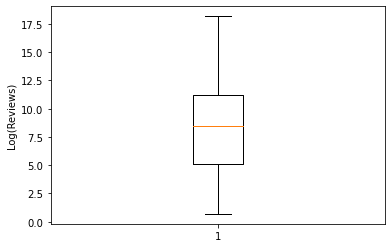

In [172]:
plt.boxplot(df['Reviews'])
plt.ylabel('Log(Reviews)')
plt.show()

9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into
suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where
size='Varies with device'

In [173]:
df["Size"]

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10834                  2.6M
10836                   53M
10837                  3.6M
10839    Varies with device
10840                   19M
Name: Size, Length: 8892, dtype: object

In [183]:
df['Size'] = df['Size'].str.replace('M', '000000').str.replace('K', '000').str.replace('k',"000")

In [184]:
df.drop(df[df['Size']=='Varies with device'].index,axis=0,inplace=True)

In [185]:
df['Size'] = df['Size'].str.replace('+', '').str.replace(',', '')

In [188]:
df["Size"]=pd.to_numeric(df["Size"])
df["Size"].dtypes

dtype('float64')

10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type

In [189]:
df["Installs"]

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10833         1,000+
10834           500+
10836         5,000+
10837           100+
10840    10,000,000+
Name: Installs, Length: 7424, dtype: object

In [190]:
df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '').str.strip()
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce') 

In [191]:
df['Installs'].dtypes

dtype('int64')

11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.

In [193]:
df["Price"].value_counts()

0          6877
$0.99       104
$2.99        98
$4.99        61
$1.99        53
           ... 
$6.49         1
$1.29         1
$299.99       1
$379.99       1
$1.20         1
Name: Price, Length: 68, dtype: int64

In [195]:
df['Price'] = df['Price'].str.replace('$', '')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce') 

In [196]:
df["Price"].dtypes

dtype('float64')

12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we
created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated',
'Current Ver','Android Ver' columns since which are redundant for our analysis

In [200]:
df.drop(["Rating","App","Genres","Last Updated","Current Ver","Android Ver"],axis=1,inplace=True)

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7424 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Category         7424 non-null   object 
 1   Reviews          7424 non-null   float64
 2   Size             7424 non-null   float64
 3   Installs         7424 non-null   int64  
 4   Type             7424 non-null   object 
 5   Price            7424 non-null   float64
 6   Content Rating   7424 non-null   object 
 7   Rating_category  7424 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 522.0+ KB


13. Encode the categorical columns.


In [209]:
le=LabelEncoder()

In [211]:
for col in df[["Category","Type","Content Rating","Rating_category"]]:
    df[col]=le.fit_transform(df[col])

In [212]:
df.head(5)

Category    Reviews          Size  Installs  Type  Price  Content Rating  \
0         0   5.075174  1.910000e+08     10000     0    0.0               1   
1         0   6.875232  1.410000e+08    500000     0    0.0               1   
2         0  11.379520  8.710000e+00   5000000     0    0.0               1   
3         0  12.281389  2.510000e+08  50000000     0    0.0               4   
4         0   6.875232  2.810000e+00    100000     0    0.0               1   

   Rating_category  
0                0  
1                0  
2                0  
3                0  
4                0

14. Segregate the target and independent features (Hint: Use Rating_category as the target)

In [213]:
x=df.drop("Rating_category",axis=1)
y=df["Rating_category"]

15. Split the dataset into train and test.


In [217]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)

16. Standardize the data, so that the values are within a particular range.

In [218]:
ss=StandardScaler()

In [219]:
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)